In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [130]:
df=pd.read_csv("hr_data.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [133]:
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [14]:
df.shape

(14999, 10)

In [67]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
df.duplicated().sum()

3008

In [72]:
df.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [22]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [73]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [74]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [72]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [37]:
df["number_project"].value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

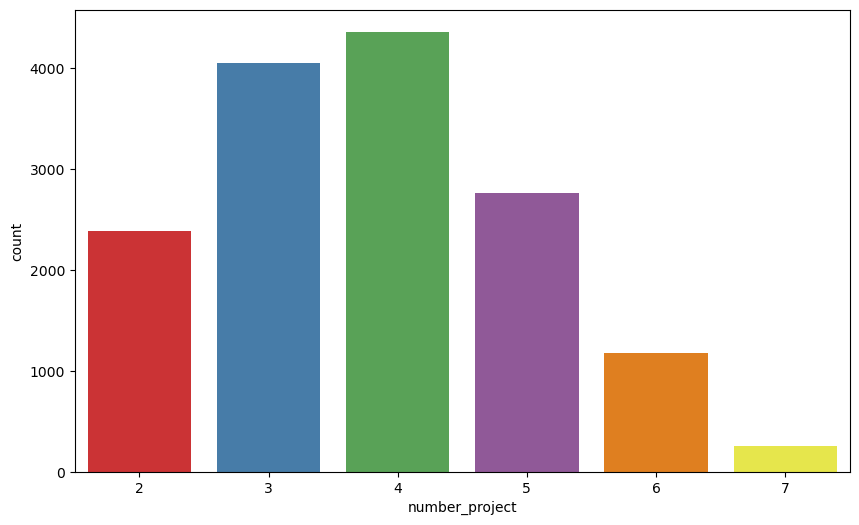

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x="number_project",data=df, palette = "Set1")
plt.show()

In [67]:
df["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [68]:
df["time_spend_company"].value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

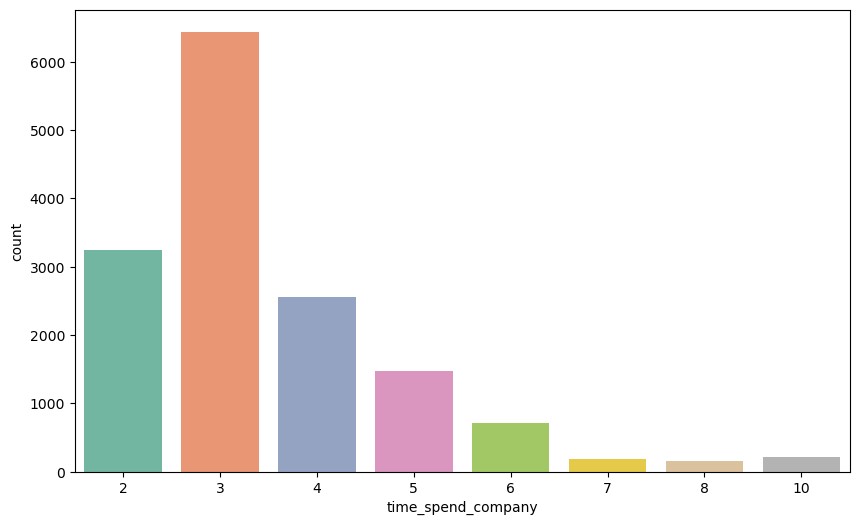

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x="time_spend_company",data=df, palette = "Set2")
plt.show()

In [70]:
df["promotion_last_5years"].unique()

array([0, 1], dtype=int64)

In [75]:
df["promotion_last_5years"].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

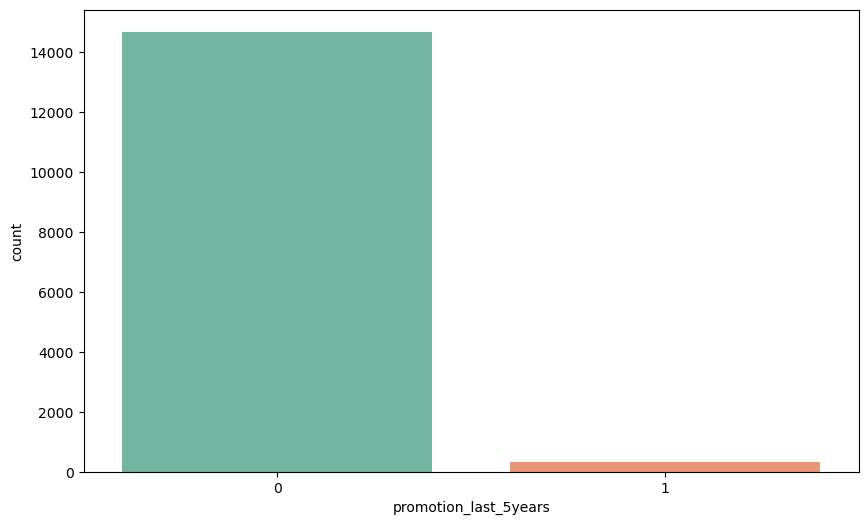

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(x="promotion_last_5years",data=df, palette = "Set2")
plt.show()

In [134]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [83]:
df["salary"].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

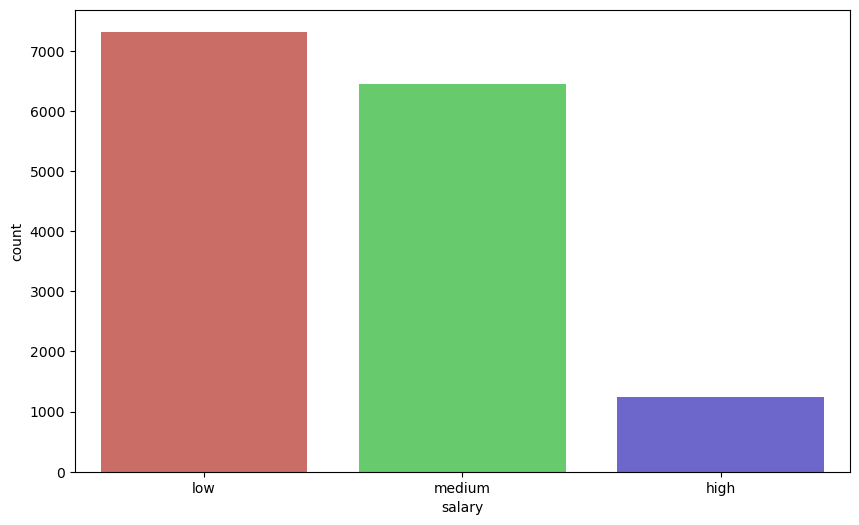

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(x="salary",data=df, palette = "hls")
plt.show()

In [138]:
df.rename(columns={"sales":"department"},inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [139]:
df["department"].replace("support","technical",inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [84]:
df["department"].replace("IT","technical",inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [141]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [143]:
df_dummy=pd.get_dummies(df,columns=["salary"], dtype = int)
df_dummy

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,technical,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,technical,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,technical,0,1,0


In [144]:
df_dummy.drop(columns=["department"],inplace = True)

In [145]:
df_dummy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [146]:
df_dummy

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,0


In [ ]:
Splitting into x and Y

In [152]:
cols=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium']
x=df_dummy[cols]
y=df_dummy["left"]

In [158]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0


In [157]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
Train/Test split

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [160]:
x_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
3502,0.81,0.60,4,179,3,0,0,0,0,1
11545,0.58,0.79,3,243,3,1,0,0,0,1
6948,0.81,0.83,3,177,2,0,0,0,0,1
11304,0.57,0.90,5,145,3,0,0,0,1,0
3259,0.62,0.58,3,202,2,0,0,0,0,1


In [161]:
x_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
11908,0.67,0.39,2,207,7,0,0,0,0,1
10508,0.51,0.98,4,245,3,0,0,0,0,1
9193,0.66,0.54,2,136,2,0,0,0,1,0
13087,0.53,0.81,3,275,2,0,0,0,1,0
506,0.83,0.98,4,259,5,0,0,0,0,1


In [162]:
y_train.head()

3502     0
11545    0
6948     0
11304    0
3259     0
Name: left, dtype: int64

In [163]:
y_test.head()

11908    0
10508    0
9193     0
13087    0
506      1
Name: left, dtype: int64

In [ ]:
Building a Model

In [ ]:
Logistic Regression Model

In [169]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_train_pred=log_reg.predict(x_train)
y_test_pred=log_reg.predict(x_test)

In [230]:
accuracy = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

In [231]:
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 100.00%


In [211]:
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 98.84%


In [185]:
print(conf_matrix)

[[3803   14]
 [  63  620]]


In [184]:
print(class_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3817
           1       0.98      0.91      0.94       683

    accuracy                           0.98      4500
   macro avg       0.98      0.95      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [ ]:
Random Forest Model

In [213]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [204]:
accuracy = accuracy_score(y_test, y_test_pred)

In [214]:
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 98.84%


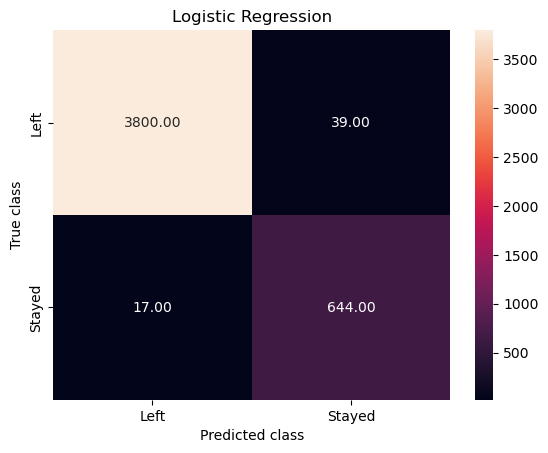

In [226]:
log_reg_cm = metrics.confusion_matrix(y_test_pred, y_test)
sns.heatmap(log_reg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] ,yticklabels = ["Left", "Stayed"]) 
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.show()

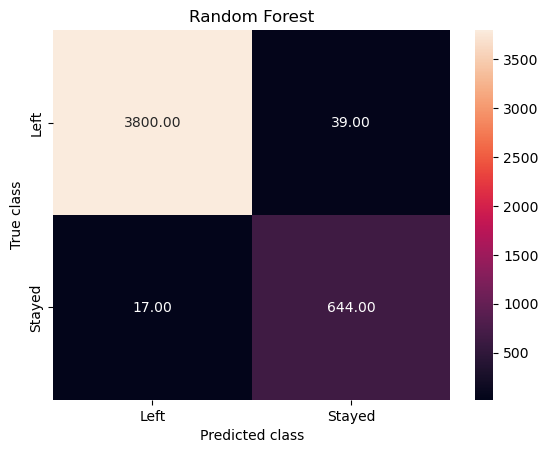

In [223]:
forest_cm = metrics.confusion_matrix(y_test_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

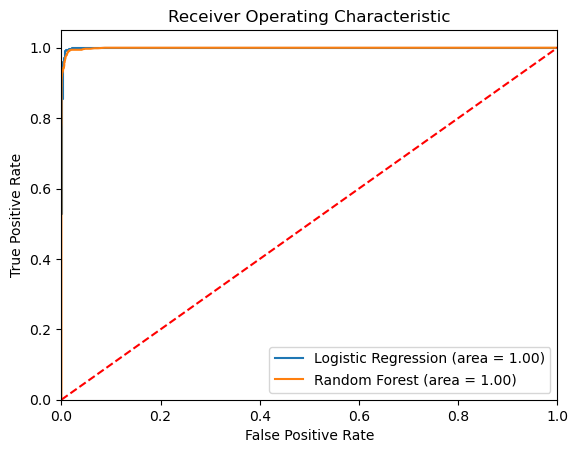

In [233]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
